<a href="https://colab.research.google.com/github/hanucherukuri/Big_Mart_Sales_Prediction/blob/main/Big_Mart_Sales_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To build a predictive model and predict the sales of each product at a particular outle

Import packages

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Aqusition

In [68]:
train=pd.read_csv("/content/drive/My Drive/Big Mart Sales Prediction/train_v9rqX0R.csv")
test=pd.read_csv("/content/drive/My Drive/Big Mart Sales Prediction/test_AbJTz2l.csv")


In [69]:
train['from']='train'
test['from']='test'
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 13)


# Data wrangling

In [70]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [71]:
df.shape

(14204, 13)

In [72]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [73]:
df.isna().sum()
# apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
from                            0
dtype: int64

In [74]:
df["Item_Weight"].astype("float").mean()
df.Item_Weight=df.Item_Weight.fillna(df.Item_Weight.mean())

In [75]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [76]:
df.Outlet_Size=df.Outlet_Size.fillna("Medium")

In [77]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [78]:
df["Item_Fat_Content"].replace(["Low Fat", "LF","low fat", "Regular", "reg"],["Low_Fat", "Low_Fat", "Low_Fat", "Regular", "Regular"], inplace=True)
df["Item_Fat_Content"].value_counts()

Low_Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [80]:
dummy_var=pd.get_dummies(df["Item_Fat_Content"])
dummy_var.head()

,Low_Fat,Regular
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [81]:
df=pd.concat([df,dummy_var], axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from,Low_Fat,Regular
0,FDA15,9.30,Low_Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,1
2,FDN15,17.50,Low_Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,0,1
4,NCD19,8.93,Low_Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,1,0


In [82]:
df.drop("Item_Fat_Content", axis=1, inplace=True)

In [83]:
df.Item_Visibility.mean()

0.06595278007399345

In [84]:
df.loc[df["Item_Visibility"]==0, "Item_Visibility"]=df.Item_Visibility.mean() 



# Exploratory Data Analysis

In [85]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
from                             2
Low_Fat                          2
Regular                          2
dtype: int64

In [86]:
df.pivot_table(index= "Outlet_Type", values="Item_Outlet_Sales")

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [87]:
df.pivot_table(index="Outlet_Location_Type", values="Item_Outlet_Sales")

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


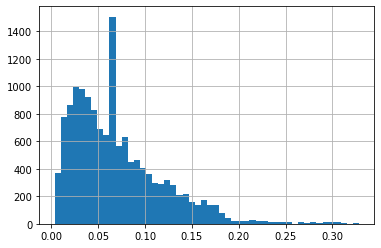

In [88]:
df.Item_Visibility.hist(bins=50)

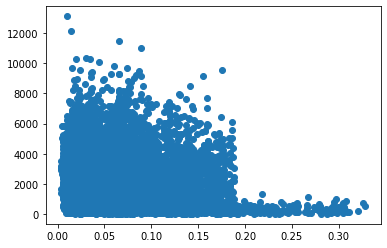

In [89]:
plt.scatter(df.Item_Visibility, df.Item_Outlet_Sales)

In [90]:
df['Item_Type_Combined']=df.Item_Identifier.apply(lambda x:x[0:2])
df['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [91]:
df["Item_Type_Combined"]=df["Item_Type_Combined"].map({"FD":"Food_Drink", "NC":"Non_Consumable", "DR":"Drinks"})

In [92]:
df["Item_Type_Combined"].value_counts()

Food_Drink        10201
Non_Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [93]:
df["Outlet_Years"]=2013-df["Outlet_Establishment_Year"]

In [94]:
df["Outlet_Years"].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [95]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from,Low_Fat,Regular,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,1,0,Food_Drink,14
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,1,Drinks,4
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,1,0,Food_Drink,14
3,FDX07,19.20,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,0,1,Food_Drink,15
4,NCD19,8.93,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,1,0,Non_Consumable,26


# Encoding

In [96]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [97]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from,Low_Fat,Regular,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,0,1,14,9
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,1,0,4,3
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,0,1,14,9
3,FDX07,19.20,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,0,1,1,15,0
4,NCD19,8.93,0.065953,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,1,0,2,26,1


In [98]:
df.drop(["Item_Identifier","Item_Type","Outlet_Identifier", "Outlet_Establishment_Year"], axis=1, inplace=True)

In [99]:
df.shape

(14204, 13)

In [100]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from,Low_Fat,Regular,Item_Type_Combined,Outlet_Years,Outlet
0,9.30,0.016047,249.8092,1,0,1,3735.1380,train,1,0,1,14,9
1,5.92,0.019278,48.2692,1,2,2,443.4228,train,0,1,0,4,3
2,17.50,0.016760,141.6180,1,0,1,2097.2700,train,1,0,1,14,9
3,19.20,0.065953,182.0950,1,2,0,732.3800,train,0,1,1,15,0
4,8.93,0.065953,53.8614,0,2,1,994.7052,train,1,0,2,26,1


In [101]:
train1=df.loc[df["from"]=="train"]
test1=df.loc[df["from"]=="test"]
print(train1.shape)
print(test1.shape)

(8523, 13)
(5681, 13)


# Drop Unnecessary Data

In [102]:
train1.drop("from", axis=1, inplace=True)
test1.drop(["from", "Item_Outlet_Sales"], axis=1, inplace=True)
print(train1.shape)
print(test1.shape)

(8523, 12)
(5681, 11)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
x_data=train1.drop("Item_Outlet_Sales", axis=1)
x_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Low_Fat,Regular,Item_Type_Combined,Outlet_Years,Outlet
0,9.30,0.016047,249.8092,1,0,1,1,0,1,14,9
1,5.92,0.019278,48.2692,1,2,2,0,1,0,4,3
2,17.50,0.016760,141.6180,1,0,1,1,0,1,14,9
3,19.20,0.065953,182.0950,1,2,0,0,1,1,15,0
4,8.93,0.065953,53.8614,0,2,1,1,0,2,26,1


In [104]:
y_data=train1.Item_Outlet_Sales
y_data.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Data standardization

In [105]:
from sklearn.preprocessing import StandardScaler
data=x_data
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


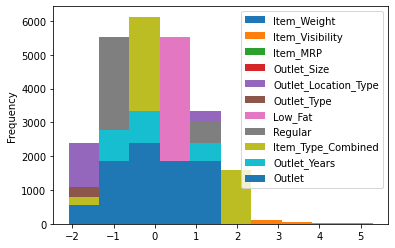

In [106]:
x_data1=pd.DataFrame(scaler.transform(data), columns=x_data.columns)
x_data1.plot.hist()

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data1, y_data, test_size=0.20, random_state=42)


# XG Boost Model

In [108]:
# creating XGBoost model
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
y_pred

[14:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([1286.6923 ,  686.7368 ,  728.8328 , ...,  702.2718 ,  652.83826,
       1633.3677 ], dtype=float32)

In [109]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

1029.62507504302

In [110]:
# predicting on actual test data
y_result = XGB.predict(test1)
y_result

array([6045.898 , 6045.898 , 5196.1733, ..., 5080.446 , 6045.898 ,
       5045.417 ], dtype=float32)

In [111]:
#creating results .csv file
result = pd.DataFrame()
result['Item_Identifier'] = test['Item_Identifier']
result['Outlet_Identifier'] = test['Outlet_Identifier']
result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
result.to_csv('Bigmart_XGBoost.csv',index = False)

#Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_hat=reg.predict(X_test)
y_hat

array([1099.25363622,  606.64367875, 1123.74541279, ...,  557.3859898 ,
       1154.06306613, 1759.22131417])

In [113]:
rmse = sqrt(mean_squared_error(y_test, y_hat))
rmse

1135.9510232598732

# AdaBoost Regressor

In [114]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1182.9663425140036


# Decesion TreeRegressor

In [115]:
from sklearn.tree import DecisionTreeRegressor

DTmodel = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
DTmodel.fit(X_train, y_train)
# predicting the test set results
y_pred = DTmodel.predict(X_test)
print(y_pred)

[1850.97177731  713.94023478  713.94023478 ...  713.94023478  713.94023478
 1609.01794582]


In [116]:
# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1055.1749965537795


In [117]:
# predicting on actual test data
y_result1 = DTmodel.predict(test1)
y_result1

array([5066.82910947, 5066.82910947, 5066.82910947, ..., 5066.82910947,
       5066.82910947, 5066.82910947])

In [118]:
#creating results .csv file
result = pd.DataFrame()
result['Item_Identifier'] = test['Item_Identifier']
result['Outlet_Identifier'] = test['Outlet_Identifier']
result["Item_Outlet_Sales"] = y_result1
result = result.sort_index()
result.to_csv('Bigmart_XGBoost1.csv',index = False)

# Random Forest Regression

In [119]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
RFmodel.fit(X_train, y_train)
# predicting the  test set results
y_pred = RFmodel.predict(X_test)
print(y_pred)

[ 647.177574  890.068072  801.283642 ...  795.631     601.856568
 1424.126226]


In [120]:
# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1082.7689093770352
